In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_dir = "drive/MyDrive/vio/chest_xray/train"
test_dir = "drive/MyDrive/vio/chest_xray/test"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Test generatorı
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

train_labels = train_generator.classes
#classes = np.unique(train_labels)
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(zip(np.unique(train_labels), class_weights))
print(f"Class Weights: {class_weights}")

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

call_backs = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('keras_model2.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
]


history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=call_backs
)


test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


#model.save("resnet50_chest_xray.h5")


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class Weights: {np.int32(0): np.float64(1.9445479962721341), np.int32(1): np.float64(0.6730645161290323)}
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7415 - loss: 0.5705

131/131 ━━━━━━━━━━━━━━━━━━━━ 1094s 8s/step - accuracy: 0.7416 - loss: 0.5703 - val_accuracy: 0.7498 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.7652 - loss: 0.4660

131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 779ms/step - accuracy: 0.7653 - loss: 0.4658 - val_accuracy: 0.7756 - val_loss: 0.4209 - learning_rate: 0.0010
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.7945 - loss: 0.4196

131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 777ms/step - accuracy: 0.7945 - loss: 0.4195 - val_accuracy: 0.7958 - val_loss: 0.4127 - learning_rate: 0.0010
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 756ms/step - accuracy: 0.8250 - loss: 0.3724 - val_accuracy: 0.8015 - val_loss: 0.4205 - learning_rate: 0.0010
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 758ms/step - accuracy: 0.8268 - loss: 0.3807 - val_accuracy: 0.7958 - val_loss: 0.4616 - learning_rate: 0.0010
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.8379 - loss: 0.3635

131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 783ms/step - accuracy: 0.8379 - loss: 0.3634 - val_accuracy: 0.8169 - val_loss: 0.3592 - learning_rate: 0.0010
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 100s 763ms/step - accuracy: 0.8460 - loss: 0.3476 - val_accuracy: 0.7862 - val_loss: 0.4589 - learning_rate: 0.0010
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 776ms/step - accuracy: 0.8361 - loss: 0.3431 - val_accuracy: 0.8092 - val_loss: 0.3977 - learning_rate: 0.0010
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.8332 - loss: 0.3496

131/131 ━━━━━━━━━━━━━━━━━━━━ 100s 771ms/step - accuracy: 0.8333 - loss: 0.3495 - val_accuracy: 0.8389 - val_loss: 0.3482 - learning_rate: 0.0010
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.8522 - loss: 0.3144

131/131 ━━━━━━━━━━━━━━━━━━━━ 100s 764ms/step - accuracy: 0.8522 - loss: 0.3144 - val_accuracy: 0.8389 - val_loss: 0.3445 - learning_rate: 0.0010
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 100s 760ms/step - accuracy: 0.8495 - loss: 0.3265 - val_accuracy: 0.7526 - val_loss: 0.5347 - learning_rate: 0.0010
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.8482 - loss: 0.3441

131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 777ms/step - accuracy: 0.8483 - loss: 0.3440 - val_accuracy: 0.8514 - val_loss: 0.3253 - learning_rate: 0.0010
Epoch 13/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.8664 - loss: 0.3061

131/131 ━━━━━━━━━━━━━━━━━━━━ 101s 767ms/step - accuracy: 0.8664 - loss: 0.3061 - val_accuracy: 0.8523 - val_loss: 0.3095 - learning_rate: 0.0010
Epoch 14/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.8618 - loss: 0.3064

131/131 ━━━━━━━━━━━━━━━━━━━━ 100s 764ms/step - accuracy: 0.8618 - loss: 0.3064 - val_accuracy: 0.8562 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 15/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 101s 770ms/step - accuracy: 0.8764 - loss: 0.2934 - val_accuracy: 0.8514 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 16/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 101s 774ms/step - accuracy: 0.8664 - loss: 0.3074 - val_accuracy: 0.8629 - val_loss: 0.3128 - learning_rate: 0.0010
Epoch 17/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 761ms/step - accuracy: 0.8757 - loss: 0.2927 - val_accuracy: 0.8600 - val_loss: 0.3069 - learning_rate: 0.0010
Epoch 18/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.8785 - loss: 0.2749
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 758ms/step - accuracy: 0.8784 - loss: 0.2749 - val_accuracy: 0.8255 - val_loss: 0.3812 - learning_rate: 0.0010
Epoch 19/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.8843 

131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 778ms/step - accuracy: 0.8843 - loss: 0.2723 - val_accuracy: 0.8677 - val_loss: 0.2831 - learning_rate: 2.0000e-04
Epoch 20/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.8903 - loss: 0.2577

131/131 ━━━━━━━━━━━━━━━━━━━━ 101s 769ms/step - accuracy: 0.8902 - loss: 0.2578 - val_accuracy: 0.8763 - val_loss: 0.2658 - learning_rate: 2.0000e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 149s 8s/step - accuracy: 0.6394 - loss: 0.7079
Test accuracy: 0.7901


In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

# 🔹 Modeli yükle
model = load_model("keras_model.h5")

# 🔹 Görseli hazırla
img_path = "drive/MyDrive/vio/chest_xray/val/NORMAL/4.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# 🔹 Normalizasyon (ResNet kullandıysan)
img_array = preprocess_input(img_array)

# 🔹 Tahmin yap
prediction = model.predict(img_array)
pred_class = (prediction >= 0.5).astype(int)[0][0]

print(f"Prediction Score: {prediction[0][0]:.4f}")
print(f"Class: {'Pneumonia' if pred_class == 1 else 'Normal'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction Score: 1.0000
Class: Pneumonia


In [ ]:
# Chatgpt ile yapılmıştır Pytorch da işleyişi analamak amacıyla

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import copy
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------- #
#       Transforms
# ----------------------------- #
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ----------------------------- #
#       Dataset ve Loader
# ----------------------------- #
train_dir = "drive/MyDrive/vio/chest_xray/train"
test_dir = "drive/MyDrive/vio/chest_xray/test"

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_size = int(0.2 * len(train_dataset))
train_size = len(train_dataset) - val_size

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])
val_dataset.dataset.transform = val_test_transforms

test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


all_labels = [label for _, label in train_dataset]
classes = np.unique(all_labels)
class_weights = compute_class_weight('balanced', classes=classes, y=all_labels)
pos_weight = torch.tensor([class_weights[1] / class_weights[0]], dtype=torch.float).to(device)


model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # Binary classification için
model = model.to(device)


criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)


patience = 5
best_val_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
num_epochs = 20

def train_model(model, criterion, optimizer, num_epochs=20):
    global best_val_loss, best_model_wts, epochs_no_improve

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device).float().unsqueeze(1)  # shape = (batch_size, 1)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    preds = (torch.sigmoid(outputs) > 0.5).float()

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += inputs.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # Early Stopping
            if phase == 'val':
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    epochs_no_improve = 0
                    torch.save(model.state_dict(), 'best_model_resnet18.pth')
                else:
                    epochs_no_improve += 1
                    if epochs_no_improve >= patience:
                        print("Early stopping triggered.")
                        model.load_state_dict(best_model_wts)
                        return model

    model.load_state_dict(best_model_wts)
    return model

# ----------------------------- #
#           Eğitim
# ----------------------------- #
model = train_model(model, criterion, optimizer, num_epochs=num_epochs)

# ----------------------------- #
#           Test
# ----------------------------- #
model.eval()
running_corrects = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        outputs = model(inputs)
        preds = (torch.sigmoid(outputs) > 0.5).float()

        running_corrects += torch.sum(preds == labels.data)
        total_samples += inputs.size(0)

test_acc = running_corrects.double() / total_samples
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
----------
train Loss: 0.0678 Acc: 0.9454
val Loss: 0.1250 Acc: 0.9482
Epoch 2/20
----------
train Loss: 0.0420 Acc: 0.9698
val Loss: 0.0712 Acc: 0.9664
Epoch 3/20
----------
train Loss: 0.0339 Acc: 0.9756
val Loss: 0.0374 Acc: 0.9712
Epoch 4/20
----------
train Loss: 0.0332 Acc: 0.9768
val Loss: 0.0446 Acc: 0.9549
Epoch 5/20
----------
train Loss: 0.0179 Acc: 0.9861
val Loss: 0.0554 Acc: 0.9751
Epoch 6/20
----------
train Loss: 0.0181 Acc: 0.9875
val Loss: 0.0516 Acc: 0.9703
Epoch 7/20
----------
train Loss: 0.0171 Acc: 0.9885
val Loss: 0.0434 Acc: 0.9626
Epoch 8/20
----------
train Loss: 0.0080 Acc: 0.9954
val Loss: 0.0400 Acc: 0.9760
Early stopping triggered.
Test Accuracy: 0.8894


In [25]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# 🔹 Görseli yükle
img_path = "drive/MyDrive/vio/chest_xray/val/PNEUMONIA/6.jpeg"
image = Image.open(img_path).convert("RGB")

# 🔹 ResNet gibi modeller için normalize et
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
image_tensor = transform(image).unsqueeze(0)  # batch dimension ekle

# 🔹 Modeli yükle
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)
model = model.to(device)


model.load_state_dict(torch.load("best_model_resnet18.pth"))
model.eval()
model.to(device)

# 🔹 Tahmin yap
image_tensor = image_tensor.to(device)
with torch.no_grad():
    output = model(image_tensor)
    prediction = torch.sigmoid(output)
    pred_class = (prediction >= 0.5).int().item()

print(f"Prediction Score: {prediction.item():.4f}")
print(f"Class: {'Pneumonia' if pred_class == 1 else 'Normal'}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Prediction Score: 0.9999
Class: Pneumonia


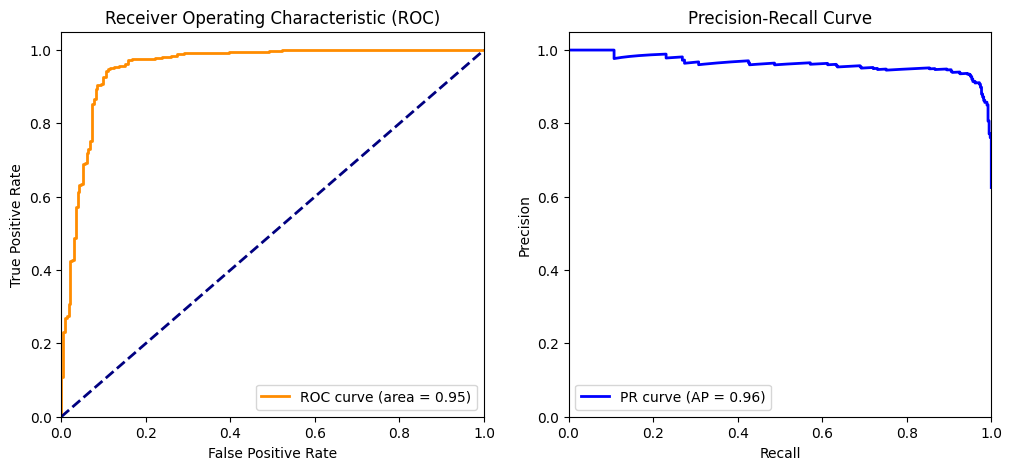

In [26]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        probs = torch.sigmoid(outputs).cpu().numpy()
        labels = labels.cpu().numpy()

        all_probs.extend(probs.flatten())
        all_labels.extend(labels.flatten())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)


fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')


precision, recall, _ = precision_recall_curve(all_labels, all_probs)
avg_precision = average_precision_score(all_labels, all_probs)

plt.subplot(1,2,2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.show()
